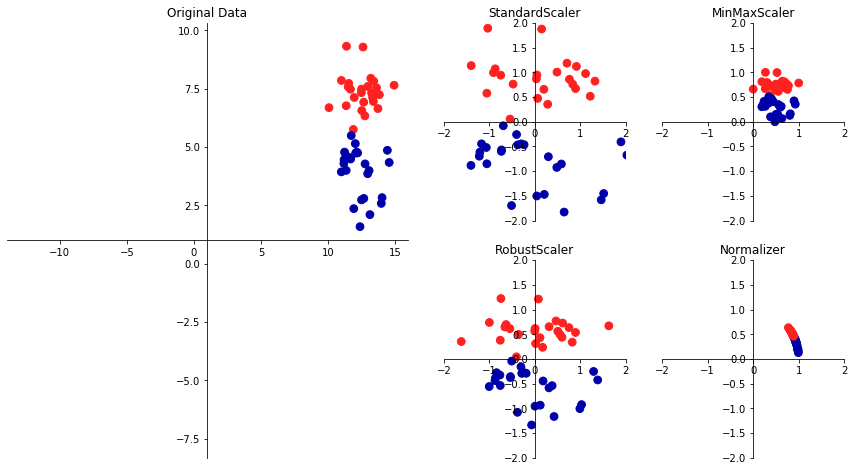

In [4]:
%matplotlib inline
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_scaling()
# 표준편차를 구하는 이유 : 중심으로 부터 이격
# 분석에서는 분산 => 주성분 // 분산이 커야함
# z점수 = (관측치-평균)/표준편차
# 표준화-> 표준정규분포 ( 확률 )

In [9]:
import pandas as pd
import numpy as np
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [10]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [11]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [12]:
df[3] = np.nan

In [16]:
df.dropna(axis='columns', how='all') # 모두가 nan

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [17]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [18]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [19]:
data.fillna(method='ffill') # forward fill 

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [20]:
data.fillna(method='bfill') # backwawrd fill

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

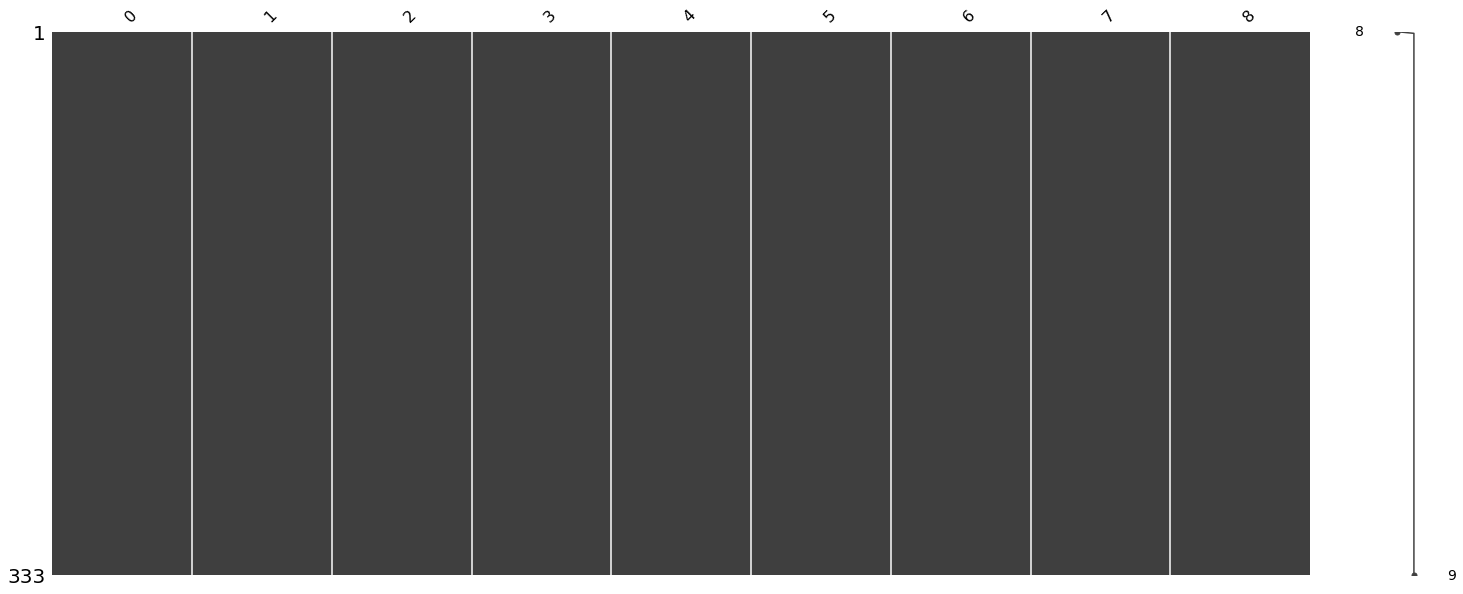

In [23]:
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('diab.csv', header=None)
msno.matrix(df)
plt.show()

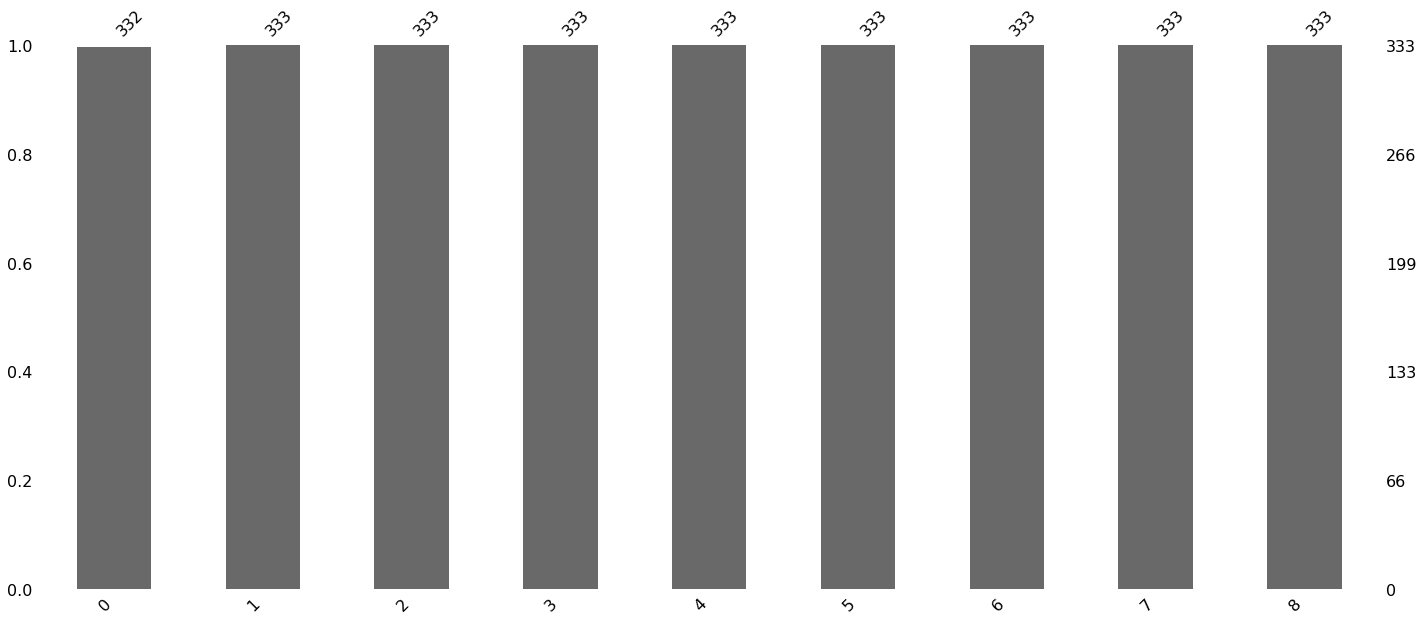

In [25]:
msno.bar(df)
plt.show() # 시각화를 통해 na값 찾기

In [26]:
df.dropna()

,0,1,2,3,4,5,6,7,8
1,1.0,6,148,72,35,33.6,0.627,50,Yes
2,2.0,1,85,66,29,26.6,0.351,31,No
3,3.0,1,89,66,23,28.1,0.167,21,No
4,4.0,3,78,50,32,31,0.248,26,Yes
5,5.0,2,197,70,45,30.5,0.158,53,Yes
...,...,...,...,...,...,...,...,...,...
328,328.0,2,88,58,26,28.4,0.766,22,No
329,329.0,9,170,74,31,44,0.403,43,Yes
330,330.0,10,101,76,48,32.9,0.171,63,No
331,331.0,5,121,72,23,26.2,0.245,30,No


In [33]:
# 숫자의 범위 : 0 ~ 100
df = pd.DataFrame({'value': np.random.randint(0,100,20)})
print(df)
labels = [ "{0} - {1}".format(i, i+9) for i in range(0,100,10)]
print(labels)
# right=False 오른쪽 끝은 제외
# 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100
df['group'] = pd.cut(df.value, range(0,105,10), right=False, labels=labels)
print(df['group'])
raw_cat = pd.Categorical(["a","b","c","a"], categories=["b","c","d"],ordered=False)

    value
0      58
1      92
2      66
3      80
4      85
5      26
6      95
7      51
8      78
9      46
10     95
11     88
12     50
13     52
14     57
15     59
16     87
17     96
18     31
19     53
['0 - 9', '10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99']
0     50 - 59
1     90 - 99
2     60 - 69
3     80 - 89
4     80 - 89
5     20 - 29
6     90 - 99
7     50 - 59
8     70 - 79
9     40 - 49
10    90 - 99
11    80 - 89
12    50 - 59
13    50 - 59
14    50 - 59
15    50 - 59
16    80 - 89
17    90 - 99
18    30 - 39
19    50 - 59
Name: group, dtype: category
Categories (10, object): [0 - 9 < 10 - 19 < 20 - 29 < 30 - 39 ... 60 - 69 < 70 - 79 < 80 - 89 < 90 - 99]


In [34]:
# right=False 오른쪽 끝은 제외, 범주화
# 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100
df['group'] = pd.cut(df.value, range(0,105,10), right=False, labels=labels) 
#                                                             문자열 라벨을 이용해 범주화
print(df)

    value    group
0      58  50 - 59
1      92  90 - 99
2      66  60 - 69
3      80  80 - 89
4      85  80 - 89
5      26  20 - 29
6      95  90 - 99
7      51  50 - 59
8      78  70 - 79
9      46  40 - 49
10     95  90 - 99
11     88  80 - 89
12     50  50 - 59
13     52  50 - 59
14     57  50 - 59
15     59  50 - 59
16     87  80 - 89
17     96  90 - 99
18     31  30 - 39
19     53  50 - 59


In [35]:
# 범주화
raw_cat = pd.Categorical(["a","b","c","a"], categories=["b","c","d"],ordered=False)
raw_cat

[NaN, b, c, NaN]
Categories (3, object): [b, c, d]

In [38]:
# 원핫인코딩 : 선형회귀에서 범주형변수는 반드시 실행
# 연속형 + 범주형
df = pd.DataFrame({'key':['b','b','a','c','a','b'], 'data1':range(6)})
print(df)
pd.get_dummies(df['key'])

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   b      5


,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [41]:
from pandas import Series, DataFrame
# dict키는 중복이 안됨
# DataFrame = dict + 중복을 허용하고 순서를 보장
df1 = DataFrame({'key':['b','b','a','c','a','a','b'], 'data': range(7)})
print(df1)
df2 = DataFrame({'key':['a','b','d'], 'data2':range(3)})
print(df2)
print(pd.merge(df1,df2,how='inner')) # 있는 것만

print(pd.merge(df1,df2,on='key')) # 키값이 일치하는 것
print(pd.merge(df1,df2,left_on='key', right_on='key')) # 키의 이름이 다를 때 사용하는 방식
print(pd.merge(df1,df2,how='outer')) # 일치하지않는 것도 다 

  key  data
0   b     0
1   b     1
2   a     2
3   c     3
4   a     4
5   a     5
6   b     6
  key  data2
0   a      0
1   b      1
2   d      2
  key  data  data2
0   b     0      1
1   b     1      1
2   b     6      1
3   a     2      0
4   a     4      0
5   a     5      0
  key  data  data2
0   b     0      1
1   b     1      1
2   b     6      1
3   a     2      0
4   a     4      0
5   a     5      0
  key  data  data2
0   b     0      1
1   b     1      1
2   b     6      1
3   a     2      0
4   a     4      0
5   a     5      0
  key  data  data2
0   b   0.0    1.0
1   b   1.0    1.0
2   b   6.0    1.0
3   a   2.0    0.0
4   a   4.0    0.0
5   a   5.0    0.0
6   c   3.0    NaN
7   d   NaN    2.0


In [53]:
# 인덱스 이름: 계층적인덱스를 생성

data = DataFrame(np.arange(6).reshape(2,3), index=pd.Index(['Ohio','Colorado'], name='state'),
                columns = pd.Index(['one','two','three'], name='number'))
print(data)
result = data.stack() # melt
print("분리")
print(result)
print(result.unstack())

number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5
분리
state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32
number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5


In [ ]:
# 데이터 중복이 있을 수 있다는것을 기억해야함

In [69]:
data= pd.DataFrame({'k1':['one']*3+['two']*4, 'k2':[1,1,2,3,3,4,4]})
print(data)
print("중복")
print(data.duplicated())
print(data.drop_duplicates()) # 원본을 제거하는 것이 아님
data['v1']=range(7) # 원본의 형식

# data = data.drop_duplicates() # 원본을 바꾸는 것

print(data)

    k1  k2
0  one   1
1  one   1
2  one   2
3  two   3
4  two   3
5  two   4
6  two   4
중복
0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool
    k1  k2
0  one   1
2  one   2
3  two   3
5  two   4
    k1  k2  v1
0  one   1   0
1  one   1   1
2  one   2   2
3  two   3   3
4  two   3   4
5  two   4   5
6  two   4   6


In [70]:
print(data.drop_duplicates(['k1','k2'])) # 포인터에 의해서 되기때문에 => list형식으로 []
data.drop_duplicates(['k1','k2'],keep='last')

    k1  k2  v1
0  one   1   0
2  one   2   2
3  two   3   3
5  two   4   5


,k1,k2,v1
1,one,1,1
2,one,2,2
4,two,3,4
6,two,4,6


In [64]:
data = Series([1., -999., 2., -999., -1000., 3.])
print(data)
print("일정데이터를 nan으로 ", data.replace(-999, np.nan))
print("변경", data.replace([-999,-1000], np.nan))
print("짝으로", data.replace([-999,-1000],[np.nan,0]))
# 키이 데이터 형식으로 지정
print(data.replace({-999:np.nan,-1000:0}))

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64
일정데이터를 nan으로  0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64
변경 0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64
짝으로 0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64
0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64


In [72]:
# 문제
data = DataFrame(np.arange(12).reshape((3,4)),
                index=['Ohio','Colorado', 'New York'],
                columns=['one','two','three','four'])

- index의 단어를 모두 대문자로 변격하시오 ( upper )

In [80]:
data.index = data.index.map(str.upper)
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [98]:
# titlecase 첫자만 대문자
data.rename(index=str.title, columns=str.upper) # 원본데이터에 적용 안됨
# 특정 인덱스 수정하고 싶을때
data.rename(index={'OHIO':'indiana'}, columns={'three':'peekaboo'})

,one,two,peekaboo,four
indiana,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [99]:
# 다음 데이터를 18-25, 25-35, 35-60, 60-100 사이의 값으로 범주화하시오. 7 10 25 40 // 6:3*2 9:3*3 24:3*8 39:3*13 
age = [20,22,25,27,21,24,37,31,61,45,41,32]
bins = [18,25,35,60,100] # bins는 범위값

In [109]:
cats = pd.cut(age, bins, right=True) # 오른쪽 포함
print("범주화한 데이터", cats)
# 범주화 => 숫자로 매핑, 
print("code", cats.codes)
print("범주의 종류는 ",cats.categories)
print("범주별로 카운트 한 결과 ",pd.value_counts(cats))
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

범주화한 데이터 [(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]
code [0 0 0 1 0 0 2 1 3 2 2 1]
범주의 종류는  IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')
범주별로 카운크 한 결과  (18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64


-범주별로 도수분포표를 작성하시오.

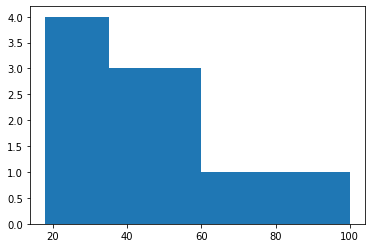

In [113]:
plt.hist(age, bins)
plt.show() 

In [122]:
# 비연속적 인덱스인 경우

# 형태
# bins = [(0,1),(5,7),(10,14)]
# pd.IntervalIndex.from_tuples(bins, closed=closed)
# x= pd.cut(array, _bins)

def cut(array, bins, labels, closed='right'):
    _bins = pd.IntervalIndex.from_tuples(bins, closed=closed)

    x = pd.cut(array, _bins)
    x.categories = labels
    return x

 

array = [3.5, 1, 0.5, 3]
bins = [(0,1), (1,2), (3,4)]
labels = ['first', 'second', 'third']

df = pd.DataFrame({
    'value': array,
    'category': cut(array, bins, labels, closed='right')
})
df 

,value,category
0,3.5,third
1,1.0,first
2,0.5,first
3,3.0,NaN


문제 1) 첫번째 컬럼의 이름을 ID_area로 지정하시오.
문제 2) regions의 값들을 중복하지 않고 몇개의 범주인지 확인하시오.
문제 3) 처음 컬럼(ID_area)에 들어온 이상한 숫자를 제거하시오.
문제 4) 산성관련성분인 'palmitic', 'palmitoleic', 'stearic', 'oleic','linoleic','arachidic','eicosenoic'의 컬럼만 추려서
        별도의 sub데이터 프레임(변수이름=dfsub)을 생성하시오.
문제 5) dfsub의 데이터를 모두 100으로 나누어 소수점으로 나타내시오.
문제 6) palmitic산과 linolenic산의 분포도를 시각화하시오.
문제 7) groupby를 활용하여 region을 기준으로 묶어서 region_groupby객체로 생성
문제 8) region_groupby에 describe() 메소드 적용하여 출력해 보시오.

In [140]:
# 문제1
df = pd.read_csv('./olive.csv')
# 데이터를 불러올때 기본적인 과정 3가지
print(df.head(5))
print(df.dtypes)
df.describe()

       Unnamed: 0  region  area  palmitic  palmitoleic  stearic  oleic  \
0  1.North-Apulia       1     1      1075           75      226   7823   
1  2.North-Apulia       1     1      1088           73      224   7709   
2  3.North-Apulia       1     1       911           54      246   8113   
3  4.North-Apulia       1     1       966           57      240   7952   
4  5.North-Apulia       1     1      1051           67      259   7771   

   linoleic  linolenic  arachidic  eicosenoic  
0       672         36         60          29  
1       781         31         61          29  
2       549         31         63          29  
3       619         50         78          35  
4       672         50         80          46  
Unnamed: 0     object
region          int64
area            int64
palmitic        int64
palmitoleic     int64
stearic         int64
oleic           int64
linoleic        int64
linolenic       int64
arachidic       int64
eicosenoic      int64
dtype: object


,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,1.699301,4.599650,1231.741259,126.094406,228.865385,7311.748252,980.527972,31.888112,58.097902,16.281469
std,0.859968,2.356687,168.592264,52.494365,36.744935,405.810222,242.799221,12.968697,22.030250,14.083295
min,1.000000,1.000000,610.000000,15.000000,152.000000,6300.000000,448.000000,0.000000,0.000000,1.000000
25%,1.000000,3.000000,1095.000000,87.750000,205.000000,7000.000000,770.750000,26.000000,50.000000,2.000000
50%,1.000000,3.000000,1201.000000,110.000000,223.000000,7302.500000,1030.000000,33.000000,61.000000,17.000000
75%,3.000000,7.000000,1360.000000,169.250000,249.000000,7680.000000,1180.750000,40.250000,70.000000,28.000000
max,3.000000,9.000000,1753.000000,280.000000,375.000000,8410.000000,1470.000000,74.000000,105.000000,58.000000


In [144]:
# 실제값을 변경할 때는 :inplace =True
df.rename(columns={'Unnamed: 0':'ID_area'},inplace = True)
# 이름 대신 df.columns[0]을 대입해도 된다.
print(df.columns) # 컬럼만 확인
df.head(10)

Index(['ID_area', 'region', 'area', 'palmitic', 'palmitoleic', 'stearic',
       'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic'],
      dtype='object')


,ID_area,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46
5,6.North-Apulia,1,1,911,49,268,7924,678,51,70,44
6,7.North-Apulia,1,1,922,66,264,7990,618,49,56,29
7,8.North-Apulia,1,1,1100,61,235,7728,734,39,64,35
8,9.North-Apulia,1,1,1082,60,239,7745,709,46,83,33
9,10.North-Apulia,1,1,1037,55,213,7944,633,26,52,30


In [146]:
# 문제2

# print(df.drop_duplicates(['region']))

print(df.region.unique())
print(df.area.unique())

# crosstab : 교차분석표
pd.crosstab(df.area,df.region)

[1 2 3]
[1 2 3 4 5 6 9 7 8]


region,1,2,3
area,,,
1,25,0,0
2,56,0,0
3,206,0,0
4,36,0,0
5,0,65,0
6,0,33,0
7,0,0,50
8,0,0,50
9,0,0,51


In [147]:
# 문제3
df['ID_area']=df['ID_area'].apply(lambda x: x.split('.')[1])
df.head(10)

In [152]:
# 문제 4
acidlist = ['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic','arachidic','eicosenoic']
dfsub = df[acidlist]
dfsub.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,arachidic,eicosenoic
0,1075,75,226,7823,672,60,29
1,1088,73,224,7709,781,61,29
2,911,54,246,8113,549,63,29
3,966,57,240,7952,619,78,35
4,1051,67,259,7771,672,80,46


In [154]:
# 문제 5
dfsub = df[acidlist].apply(lambda x: x/100.0)
df[acidlist] = dfsub # 원본데이터
df.head()

,ID_area,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,0.1075,0.0075,0.0226,0.7823,0.0672,36,0.0060,0.0029
1,North-Apulia,1,1,0.1088,0.0073,0.0224,0.7709,0.0781,31,0.0061,0.0029
2,North-Apulia,1,1,0.0911,0.0054,0.0246,0.8113,0.0549,31,0.0063,0.0029
3,North-Apulia,1,1,0.0966,0.0057,0.0240,0.7952,0.0619,50,0.0078,0.0035
4,North-Apulia,1,1,0.1051,0.0067,0.0259,0.7771,0.0672,50,0.0080,0.0046


Text(0, 0.5, 'linolenic')

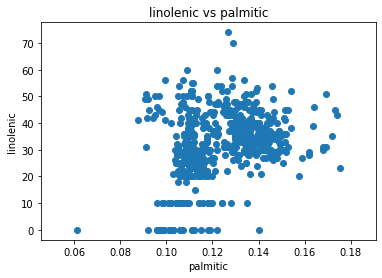

In [155]:
# 문제6
fig = plt.figure()
plt.scatter(df["palmitic"], df["linolenic"])
axis = fig.gca()
axis.set_title('linolenic vs palmitic')
axis.set_xlabel('palmitic')
axis.set_ylabel('linolenic')

In [164]:
# 문제7,8
region_groupby = df.groupby(['region']) # groupby객체
region_groupby # <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002C5041C29C8>
# 내용을 보여주려면 집계함수 사용해야함
region_groupby.apply(np.mean) # aggFunc # 주소를 주는 것이기 때문에 (x)
region_groupby.apply(lambda x: x.mean()) # 실행하는 것이기 때문에 ()
region_groupby.describe() 

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,,
1,1.0,2.783282,0.133229,0.015480,0.022877,0.710001,0.103350,38.065015,0.006312,0.002732
2,2.0,5.336735,0.111135,0.009674,0.022618,0.726802,0.119653,27.091837,0.007317,0.000194
3,3.0,8.006623,0.109480,0.008374,0.023080,0.779305,0.072703,21.788079,0.003758,0.000197
